## Part 1: Training a convolutional neural network

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt

print("-----------")

data_gen = ImageDataGenerator(rescale=1.0/255)

imgdir = 'a5_images' # or wherever you put them...
img_size = 64
batch_size = 32

train_generator = data_gen.flow_from_directory(
        imgdir + '/train',
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary',
        classes=['other', 'car'],
        seed=12345,
        shuffle=True)


validation_generator = data_gen.flow_from_directory(
        imgdir + '/validation',
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary',
        classes=['other', 'car'],
        seed=12345,
        shuffle=True)




2023-03-01 13:19:55.194715: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-01 13:19:55.299140: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-03-01 13:19:55.301634: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-01 13:19:55.301643: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudar

-----------
Found 1600 images belonging to 2 classes.
Found 576 images belonging to 2 classes.


In [31]:
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from keras.callbacks import EarlyStopping


def make_convnet():
    num_classes = 2
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(5,5), strides=(1,1),
                    activation="relu",
                    input_shape=(64,64,3)))
    model.add(Conv2D(64, (3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes - 1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)


    history = model.fit(train_generator,
            batch_size=256,
            epochs=10,
            verbose=1,
            validation_data=validation_generator,
            callbacks=[es]);
    return history


In [32]:
history = make_convnet()


Epoch 1/10
50/50 [==============================] - 10s 178ms/step - loss: 0.6962 - accuracy: 0.5456 - val_loss: 0.6684 - val_accuracy: 0.5347
Epoch 2/10
50/50 [==============================] - 15s 296ms/step - loss: 0.6053 - accuracy: 0.6725 - val_loss: 0.5951 - val_accuracy: 0.7066
Epoch 3/10
50/50 [==============================] - 19s 386ms/step - loss: 0.5677 - accuracy: 0.7119 - val_loss: 0.5703 - val_accuracy: 0.7188
Epoch 4/10
50/50 [==============================] - 19s 385ms/step - loss: 0.5263 - accuracy: 0.7462 - val_loss: 0.5489 - val_accuracy: 0.7326
Epoch 5/10
50/50 [==============================] - 20s 392ms/step - loss: 0.4852 - accuracy: 0.7675 - val_loss: 0.5484 - val_accuracy: 0.7396
Epoch 6/10
50/50 [==============================] - 20s 396ms/step - loss: 0.4460 - accuracy: 0.8006 - val_loss: 0.5506 - val_accuracy: 0.7552
Epoch 7/10
50/50 [==============================] - 19s 387ms/step - loss: 0.4080 - accuracy: 0.8131 - val_loss: 0.5345 - val_accuracy: 0.7535

### Plot Accuracy

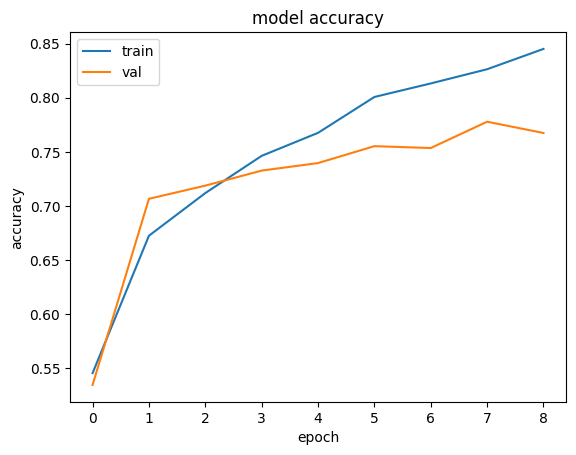

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### Plot Loss

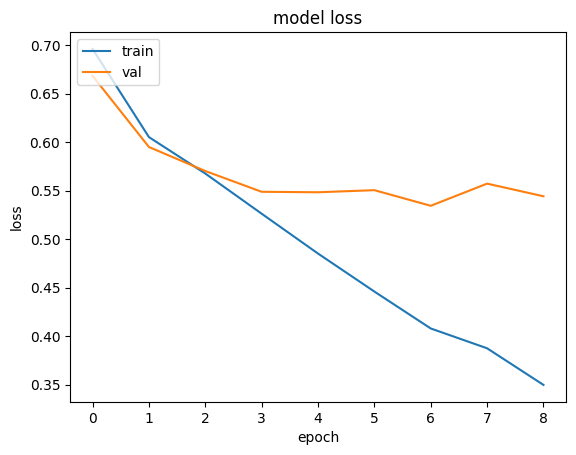

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()